In [1]:
import pandas as pd 
import warnings
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
warnings.filterwarnings("ignore")

In [5]:
import tensorflow as tf
from tensorflow.keras import layers

seed = 123
train_dir = "C:/Users/Owen/Downloads/archive/train"
validation_dir = "C:/Users/Owen/Downloads/archive/test" 

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for categorical labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=seed
)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.


In [15]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for categorical labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=seed
)

Found 5000 files belonging to 2 classes.
Using 1000 files for validation.


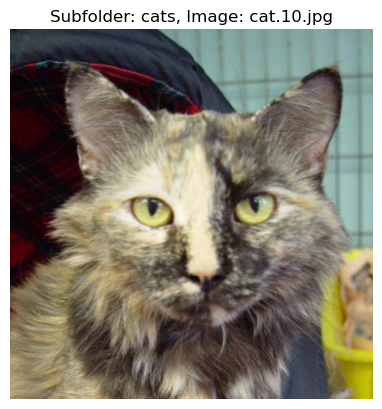

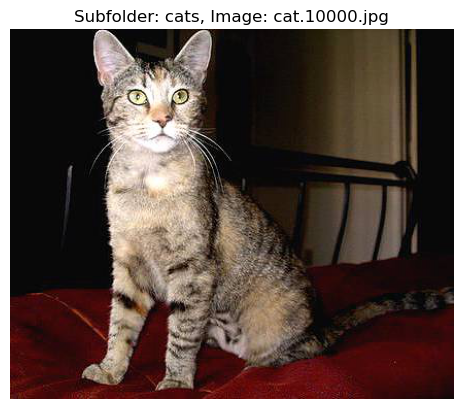

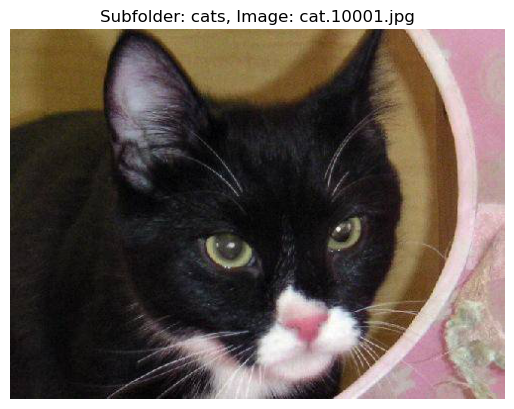

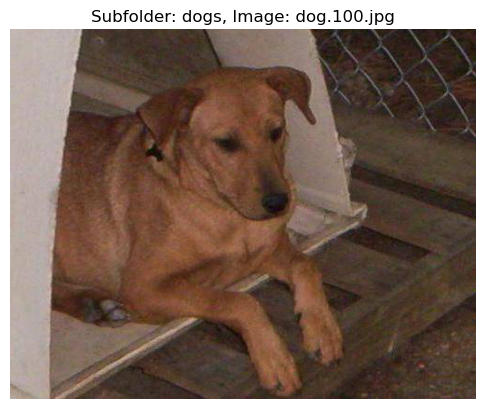

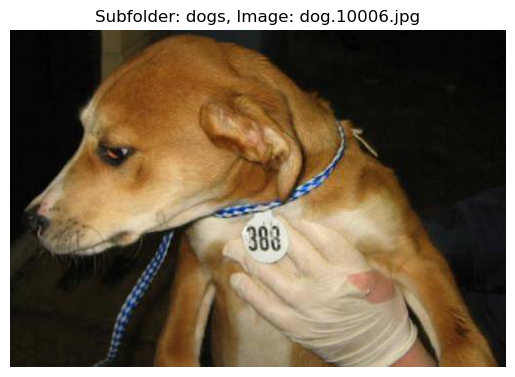

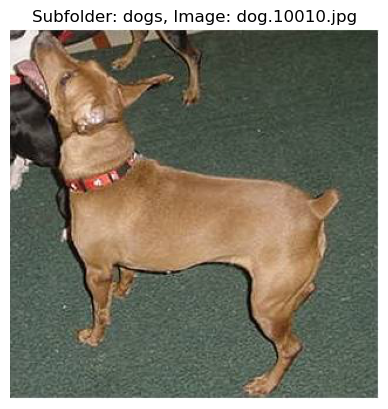

In [19]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the main folder
main_folder = "C:/Users/Owen/Downloads/archive/dogs_vs_cats/test"

# Display images from each subfolder
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        # Display images from the subfolder
        for image_file in os.listdir(subfolder_path)[:3]:
            image_path = os.path.join(subfolder_path, image_file)
            image = mpimg.imread(image_path)
            plt.imshow(image)
            plt.title(f'Subfolder: {subfolder}, Image: {image_file}')
            plt.axis('off')
            plt.show()


In [21]:
# Normalizing the data 
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [25]:
import os

# Get the directory path from the DirectoryIterator object
dataset_path = "C:/Users/Owen/Downloads/archive/dogs_vs_cats/train"

# Count the number of subdirectories (classes)
num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of classes:", num_classes)

Number of classes: 2


In [27]:
from tensorflow.keras.applications import VGG16 ,Xception

conv_base = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 104s 1us/step


In [29]:
conv_base.trainable = False

In [31]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           242 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,546,792 (86.01 MB)

 Trainable params: 560,234 (2.14 MB)

 Non-trainable params: 20,866,088 (79.60 MB)

 Optimizer params: 1,120,470 (4.27 MB)

In [39]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(train_ds, epochs=100, validation_data=validation_ds,callbacks=[EarlyStopping(patience=0)])

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1907s 4s/step - accuracy: 0.9774 - loss: 0.0645 - val_accuracy: 0.9880 - val_loss: 0.0356
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2143s 4s/step - accuracy: 0.9896 - loss: 0.0306 - val_accuracy: 0.9880 - val_loss: 0.0413


In [43]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.9888 - loss: 0.0398
Validation Loss: 0.041272856295108795
Validation Accuracy: 0.9879999756813049


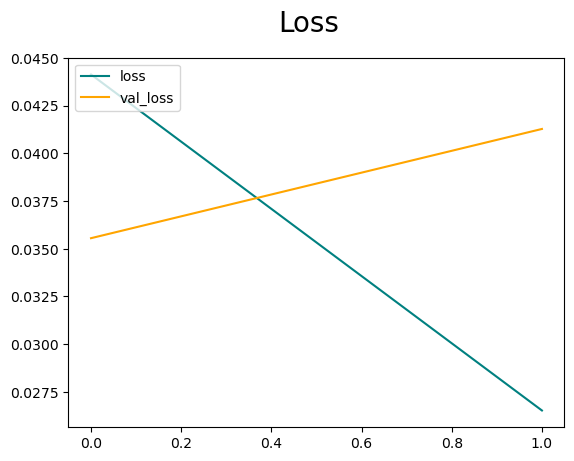

In [47]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

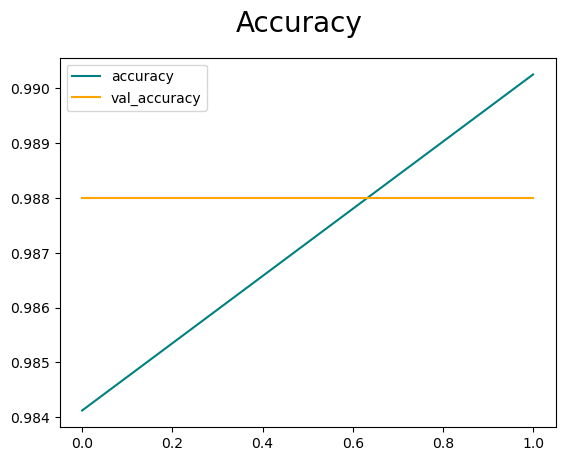

In [49]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()